In [1]:
from classical_evolution import * 

In [2]:
# Problem setup
T = .6
x0 = -3.0  # Initial position
p0 = 15.0  # Initial momentum
sigma = 0.5
L = 5    # Spatial domain [-L, L]

def initial_wave_function(x):
    val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
    return val / np.linalg.norm(val)

potential = lambda x: 100/np.cosh(x/.5)

working on time evolution: 100%|██████████| 1000/1000 [00:00<00:00, 4679.38it/s]


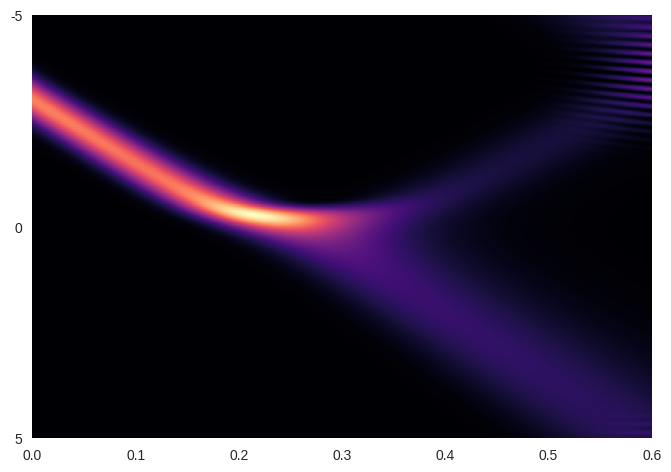

In [3]:
N = 1000
K = 1000
f = lambda input: 0
amplitudes, t_grid, x_grid = time_evolve(potential, initial_wave_function, N, L, K, T, f, ord=2)
plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=False)

working on time evolution: 100%|██████████| 1000/1000 [00:00<00:00, 5639.69it/s]


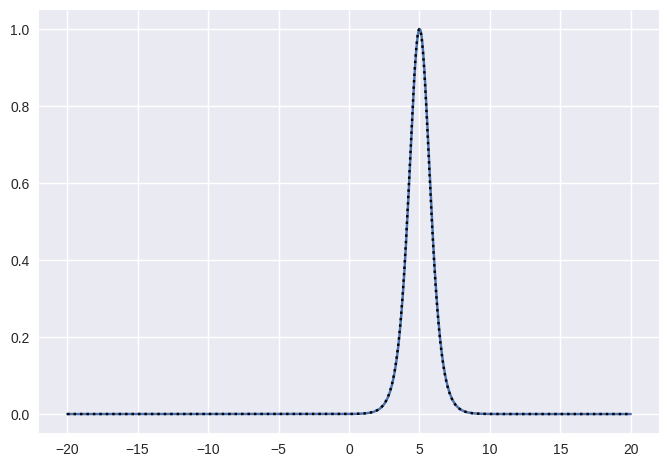

In [4]:
A = 1
beta = -1;
v = 1;
x0 = -10;
theta0 = 0;
true_sol = lambda x, t: A/np.sqrt(-beta)/np.cosh(A*(x-v*t-x0))*np.exp(1j*(v*x-1/2*(v**2-A**2)*t+theta0))

potential1 = lambda x: np.zeros_like(x)
initial_wave_function1 = lambda x: true_sol(x, 0)
f = lambda input: -input
T1 = 15
amplitudes1, t_grid1, x_grid1 = time_evolve(potential1, initial_wave_function1, 1000, 20, 1000, T1, f, ord=2)
dx1 = 2*20/(1000 - 1)

plt.plot(x_grid1, amplitudes1[-1, :]*dx1)
plt.plot(x_grid1, np.abs(true_sol(x_grid1, t_grid1[-1]))**2, ':k')
plt.show()

working on time evolution: 100%|██████████| 1000/1000 [00:00<00:00, 3163.40it/s]


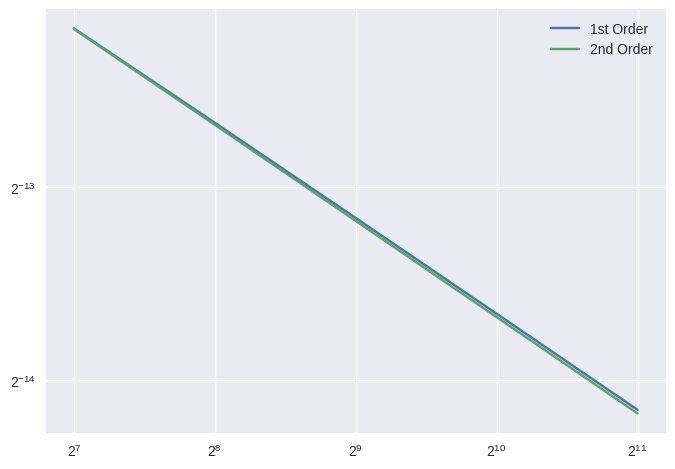

In [5]:
N_vals = [2**m for m in range(7, 12)]
K_vals = [1000 for m in range(7, 12)]
L = 20
error1, error2 = [], []
for N, K in zip(N_vals, K_vals):
    amplitudes2, t_grid2, x_grid2 = time_evolve(potential1, initial_wave_function1, N, L, K, T1, f, ord=1)
    dx2 = 2*L/(N - 1)
    amplitudes3, t_grid3, x_grid3 = time_evolve(potential1, initial_wave_function1, N, L, K, T1, f, ord=2)
    error1.append(np.linalg.norm(amplitudes2[-1, :]*dx2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/len(x_grid2))
    error2.append(np.linalg.norm(amplitudes3[-1, :]*dx2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/len(x_grid2))
plt.loglog(N_vals, error1, base=2)
plt.loglog(N_vals, error2, base=2)
plt.legend(['1st Order', '2nd Order'])
plt.show()